Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 29 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,671 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a

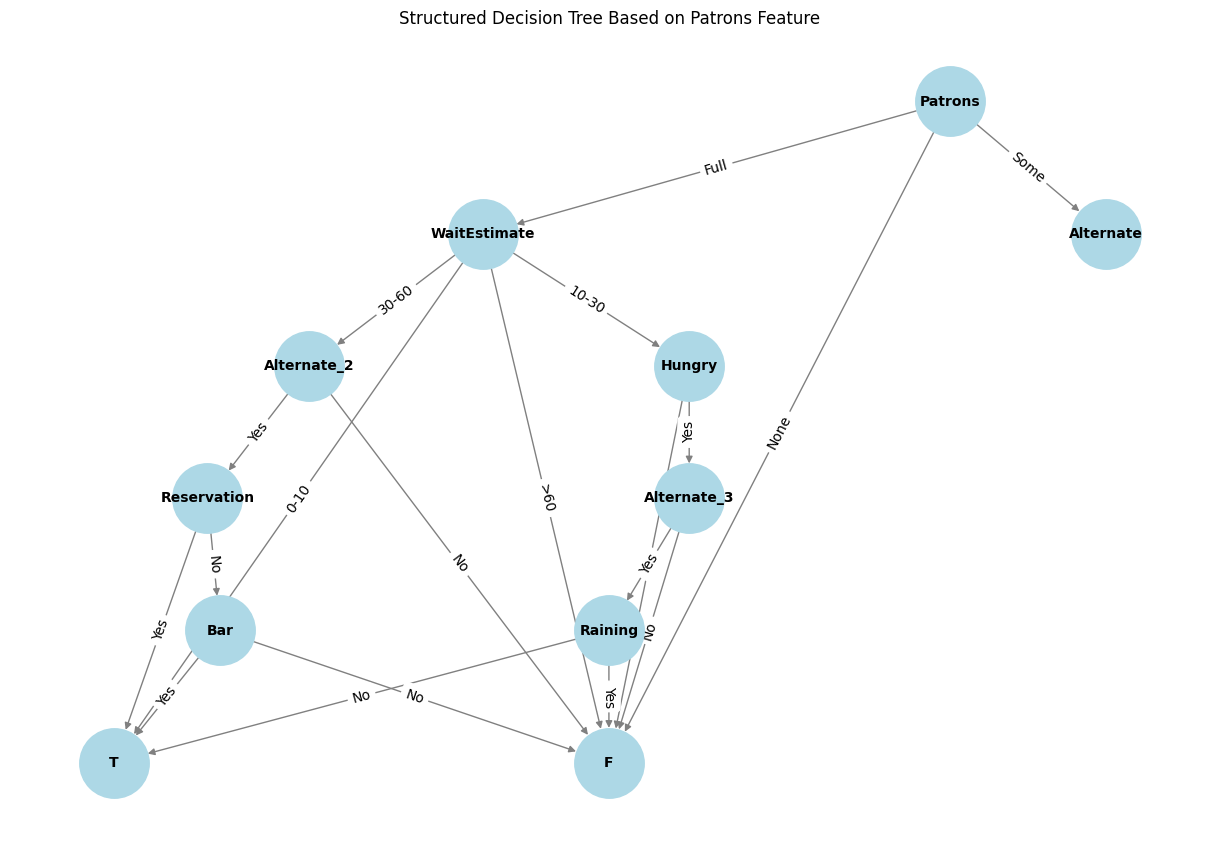

In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install --no-cache-dir pygraphviz
!pip install pygraphviz
# نصب پیش‌نیازها (اگر از Google Colab استفاده می‌کنی)
try:
    import networkx as nx
    import matplotlib.pyplot as plt
    import pygraphviz as pgv
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    !apt-get install -y graphviz
    !pip install networkx matplotlib pygraphviz
    import networkx as nx
    import matplotlib.pyplot as plt
    import pygraphviz as pgv
    from networkx.drawing.nx_agraph import graphviz_layout

# ایجاد گراف برای رسم درخت تصمیم
G = nx.DiGraph()

# افزودن گره ریشه "Patrons"
G.add_node("Patrons")

# افزودن شاخه‌های اصلی
G.add_edge("Patrons", "F", label="None")
G.add_edge("Patrons", "WaitEstimate", label="Full")
G.add_edge("Patrons", "Alternate", label="Some")

# شاخه‌های WaitEstimate
G.add_edge("WaitEstimate", "F", label=">60")
G.add_edge("WaitEstimate", "Alternate_2", label="30-60")
G.add_edge("WaitEstimate", "Hungry", label="10-30")
G.add_edge("WaitEstimate", "T", label="0-10")

# شاخه‌های Alternate_2 در مسیر 30-60
G.add_edge("Alternate_2", "F", label="No")
G.add_edge("Alternate_2", "Reservation", label="Yes")

# شاخه‌های Reservation
G.add_edge("Reservation", "Bar", label="No")
G.add_edge("Reservation", "T", label="Yes")

# شاخه‌های Bar
G.add_edge("Bar", "F", label="No")
G.add_edge("Bar", "T", label="Yes")

# شاخه‌های Hungry در مسیر 10-30
G.add_edge("Hungry", "F", label="No")
G.add_edge("Hungry", "Alternate_3", label="Yes")

# شاخه‌های Alternate_3 در مسیر Hungry
G.add_edge("Alternate_3", "F", label="No")
G.add_edge("Alternate_3", "Raining", label="Yes")

# شاخه‌های Raining
G.add_edge("Raining", "F", label="Yes")
G.add_edge("Raining", "T", label="No")

# تنظیم مکان گره‌ها برای نمایش منظم درخت
plt.figure(figsize=(12, 8))
pos = graphviz_layout(G, prog="dot")  # نمایش درختی مرتب

# رسم درخت
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10, font_weight="bold", edge_color='gray')

# نمایش برچسب‌های لبه‌ها
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Structured Decision Tree Based on Patrons Feature")
plt.show()
